 1. Import the necessary Libraries
 2. Checked the Distribution of severity level to determine the data trends
 3. Checked if any of the column contains null value as it is the important step in data preparation step
 4. Described the data to find out the trends
 5. Dtaa Prepartion
 6. Model Building
 

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier

In [75]:
#Read the file and rename the columns for easier usibility
source_folder  = "C:\\Users\\Mrunal-PC\\Desktop\\"
df = pd.read_csv(source_folder+"disease_data.csv")
df.columns = ['PatientID', 'Age', 'Sex', 'Systolic_Blood_Pressure','Diastolic_Blood_Pressure', 'Weight', 'Unknown_Metric_1','Unknown_Metric_2', 'Unknown_Metric_3', 'Unknown_Metric_4','Unknown_Metric_5', 'Severity_Level']
df.head(5)

,PatientID,Age,Sex,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,Weight,Unknown_Metric_1,Unknown_Metric_2,Unknown_Metric_3,Unknown_Metric_4,Unknown_Metric_5,Severity_Level
0,49706,39,Female,101.617996,73.906511,159.570921,37.586451,53.486912,1.142117,88.226718,0.781133,0
1,83488,18,Female,83.551292,27.639837,124.538409,1021.198140,-48.697310,10.968325,98.780793,0.127519,7
2,50220,68,Male,111.458120,57.612856,140.490142,-658.163446,64.879688,-7.924638,78.488352,3.259557,0
3,55952,59,Male,86.805826,58.821097,193.578685,-1768.631189,173.566996,-52.709014,30.386614,1.301406,2
4,89964,11,Female,115.882419,52.269411,166.770215,3473.834750,-81.505030,131.076962,227.786366,1.649680,8


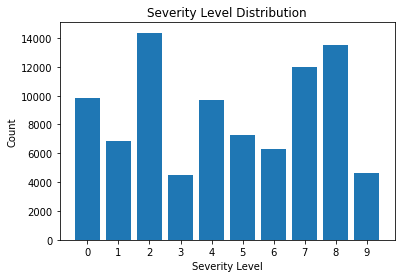

In [76]:
#Check the distribution of the Severity Level
df_count_check = df.Severity_Level.value_counts()
df_count_check = df_count_check.sort_index(axis = 0)
x = np.arange(len(df_count_check.index))
fig, ax = plt.subplots()
plt.bar(x, df_count_check.values)
plt.xticks(x, (df_count_check.index))
plt.title("Severity Level Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

In [77]:
#Check if NA values are present in the dataset
print(df.isnull().values.any())
df.describe()

False


,PatientID,Age,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,Weight,Unknown_Metric_1,Unknown_Metric_2,Unknown_Metric_3,Unknown_Metric_4,Unknown_Metric_5,Severity_Level
count,88959.000000,88959.000000,88959.000000,88959.000000,88959.000000,88959.000000,88959.000000,88959.000000,88959.000000,88959.000000,88959.000000
mean,46801.563484,32.497375,115.423501,70.541473,162.395922,-64.908233,56.960370,-8.531475,77.836563,-0.006722,4.445925
std,27034.926058,24.969818,20.663254,25.096961,21.649844,1158.767227,61.786880,44.132805,47.401901,2.002360,2.875266
min,0.000000,-70.000000,23.402478,-36.668486,75.698370,-5577.565571,-267.330496,-189.549892,-116.590625,-8.116244,0.000000
25%,23386.500000,15.000000,100.879256,53.537310,146.931203,-806.820414,18.216144,-38.718575,45.413382,-1.360208,2.000000
50%,46763.000000,33.000000,113.659461,71.677094,162.069232,-82.373845,54.861295,-10.661890,75.548340,-0.010604,4.000000
75%,70243.500000,50.000000,129.723556,87.966487,177.532595,666.668893,93.662973,21.665915,110.270797,1.346553,7.000000
max,93641.000000,145.000000,200.103087,177.117208,254.727712,4967.090579,376.109811,179.393942,279.682382,8.591893,9.000000


From the data distribution, we can see that the Age column contains negative values. So, let check the number of records where Age column has negative values.

In [78]:
age_negative_value = df[df['Age'] < 0 ].shape[0]
print("Number of records with Negative Age:%s"%age_negative_value)
print("Percentage of records with Negative Age value:{0:.2f}% ".format(age_negative_value*100/df.shape[0]))

Number of records with Negative Age:8371
Percentage of records with Negative Age value:9.41% 


As 9.41% of the records contains negative value in the Age column, we can not eliminate those records and as Age can not be negative, we will conver the Age values by using the abs function and then we can convert it into different categories to make it more accessible for model building

In [79]:
df['Age'] = df['Age'].map(lambda x: np.abs(x))
#Check if the Age column contains any negative values
print(df[df['Age'] < 0 ].shape[0])
#Convert Age into different Categories
age_bins = [0,12, 25, 45, 65, 150]
age_labels = ["Child","Young", "Middle-aged", "Senior", "Old"]
df['Age_category'] = pd.cut(df['Age'], age_bins, labels=age_labels, right=True, include_lowest=True)
df = df.drop('Age',axis= 1)

0


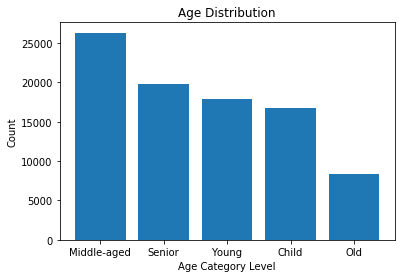

In [80]:
df_age_category_count = df.Age_category.value_counts()
df_age_category_count
x = np.arange(len(df_age_category_count.index))
fig, ax = plt.subplots()
plt.bar(x, df_age_category_count.values)
plt.xticks(x, (df_age_category_count.index))
plt.title("Age Distribution")
plt.xlabel("Age Category Level")
plt.ylabel("Count")
plt.show()

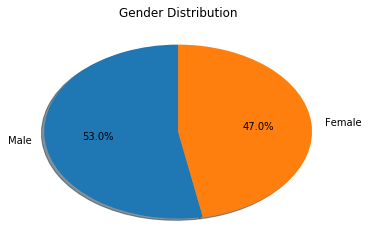

In [81]:
df_sex_count = df.Sex.value_counts()
labels  = list(df_sex_count.index)
fig1, ax1 = plt.subplots()
ax1.pie(df_sex_count.values,  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Gender Distribution")
plt.show()

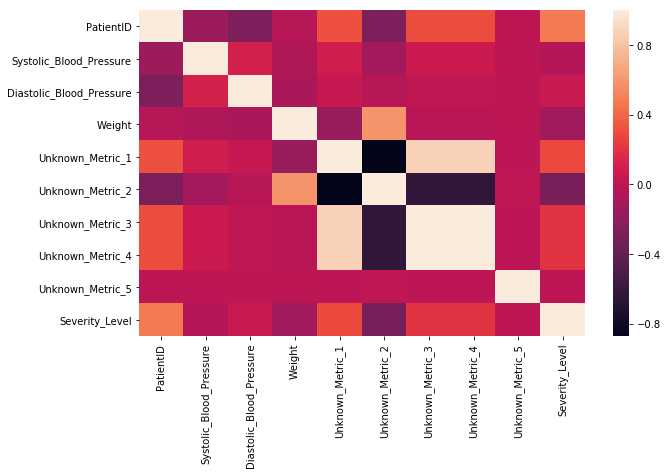

In [82]:
#Plot Correlation matrix 
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

As our data contains two Categorical variables i.e, Sex and Age Category, we will convert them into numerical variables using dummies function available in pandas. Also, PatientId is unique identifier for the patient and hence we can drop it from our calculations

In [83]:
df.head(5)

,PatientID,Sex,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,Weight,Unknown_Metric_1,Unknown_Metric_2,Unknown_Metric_3,Unknown_Metric_4,Unknown_Metric_5,Severity_Level,Age_category
0,49706,Female,101.617996,73.906511,159.570921,37.586451,53.486912,1.142117,88.226718,0.781133,0,Middle-aged
1,83488,Female,83.551292,27.639837,124.538409,1021.198140,-48.697310,10.968325,98.780793,0.127519,7,Young
2,50220,Male,111.458120,57.612856,140.490142,-658.163446,64.879688,-7.924638,78.488352,3.259557,0,Old
3,55952,Male,86.805826,58.821097,193.578685,-1768.631189,173.566996,-52.709014,30.386614,1.301406,2,Senior
4,89964,Female,115.882419,52.269411,166.770215,3473.834750,-81.505030,131.076962,227.786366,1.649680,8,Child


In [84]:
#Split the data into training and testing test
df = df.drop('PatientID',axis = 1)
y = df['Severity_Level']
y = y.apply(str)
X = df.drop('Severity_Level', axis=1)

In [85]:
def convert_categorical_dummy(df):
    age_dummies=pd.get_dummies(df['Age_category'])
    sex_dummies=pd.get_dummies(df['Sex'])
    df = df.drop('Age_category',axis=1)
    df = df.join(age_dummies)
    df = df.drop('Sex',axis=1)
    df = df.join(sex_dummies)
    
    return df


In [86]:
def randomforest(X_train,y_train,X_test,y_test):
    clf_rf= RandomForestClassifier(n_estimators= 1000,n_jobs=2,random_state=42).fit(X_train,y_train)
    pred_test=clf_rf.predict(X_test)
    return pred_test


In [87]:
def predict(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 42)
    X_train = convert_categorical_dummy(X_train)
    X_test = convert_categorical_dummy(X_test)
    predictions = randomforest(X_train,y_train,X_test,y_test)
    return predictions
    

In [88]:
predictions = predict(X,y)
print(predictions)

['5' '5' '8' ..., '4' '6' '3']
